## 1. Import libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df = pd.read_csv('./ETH.csv')
df1 = df.reset_index()['Price']

In [3]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

## 2. Split the data into training, test and validate  sets

In [4]:
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (444, 1)
Validate shape: (223, 1)


In [5]:
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1333, 1)
Test shape: (444, 1)
Validate shape: (446, 1)


In [6]:
train_size = int(0.7 * len(df1))
test_size = int(0.15 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)
print("Validate shape:", val_data.shape)

Train shape: (1556, 1)
Test shape: (333, 1)
Validate shape: (334, 1)


In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_val: ", X_val.shape)
print("y_val: ", yval.shape)
print("X_test: ", X_test.shape)
print("y_test", ytest.shape)

X_train:  (1455, 100)
y_train:  (1455,)
X_val:  (233, 100)
y_val:  (233,)
X_test:  (232, 100)
y_test (232,)


In [10]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

## 3. Perform LSTM Model

### 3.1 Build the LSTM Model and fit train data into Model

In [11]:
# Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [12]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=300,batch_size=64,verbose=1)

Epoch 1/300
23/23 [==============================] - 12s 236ms/step - loss: 0.0324 - val_loss: 0.0014
Epoch 2/300
23/23 [==============================] - 5s 211ms/step - loss: 0.0045 - val_loss: 3.0330e-04
Epoch 3/300
23/23 [==============================] - 4s 175ms/step - loss: 0.0032 - val_loss: 1.9793e-04
Epoch 4/300
23/23 [==============================] - 5s 210ms/step - loss: 0.0028 - val_loss: 1.8677e-04
Epoch 5/300
23/23 [==============================] - 5s 214ms/step - loss: 0.0025 - val_loss: 1.6167e-04
Epoch 6/300
23/23 [==============================] - 5s 213ms/step - loss: 0.0022 - val_loss: 1.3427e-04
Epoch 7/300
23/23 [==============================] - 5s 197ms/step - loss: 0.0022 - val_loss: 2.4023e-04
Epoch 8/300
23/23 [==============================] - 5s 205ms/step - loss: 0.0020 - val_loss: 1.2925e-04
Epoch 9/300
23/23 [==============================] - 5s 202ms/step - loss: 0.0019 - val_loss: 1.2086e-04
Epoch 10/300
23/23 [==============================] - 5s 2

23/23 [==============================] - 4s 192ms/step - loss: 4.7080e-04 - val_loss: 1.2690e-04
Epoch 77/300
23/23 [==============================] - 4s 188ms/step - loss: 4.1657e-04 - val_loss: 5.3430e-05
Epoch 78/300
23/23 [==============================] - 4s 178ms/step - loss: 3.9910e-04 - val_loss: 4.0997e-05
Epoch 79/300
23/23 [==============================] - 4s 163ms/step - loss: 4.5139e-04 - val_loss: 4.6118e-05
Epoch 80/300
23/23 [==============================] - 4s 171ms/step - loss: 4.5820e-04 - val_loss: 4.0169e-05
Epoch 81/300
23/23 [==============================] - 4s 162ms/step - loss: 4.7440e-04 - val_loss: 4.0649e-05
Epoch 82/300
23/23 [==============================] - 4s 171ms/step - loss: 4.3461e-04 - val_loss: 3.9918e-05
Epoch 83/300
23/23 [==============================] - 4s 176ms/step - loss: 4.7997e-04 - val_loss: 7.9002e-05
Epoch 84/300
23/23 [==============================] - 4s 173ms/step - loss: 4.3725e-04 - val_loss: 5.7680e-05
Epoch 85/300
23/23 [===

23/23 [==============================] - 4s 185ms/step - loss: 4.3343e-04 - val_loss: 3.8290e-05
Epoch 151/300
23/23 [==============================] - 4s 190ms/step - loss: 3.8123e-04 - val_loss: 3.5519e-05
Epoch 152/300
23/23 [==============================] - 4s 168ms/step - loss: 3.7350e-04 - val_loss: 3.8630e-05
Epoch 153/300
23/23 [==============================] - 4s 187ms/step - loss: 4.5646e-04 - val_loss: 6.6322e-05
Epoch 154/300
23/23 [==============================] - 4s 169ms/step - loss: 4.1483e-04 - val_loss: 4.7002e-05
Epoch 155/300
23/23 [==============================] - 4s 171ms/step - loss: 3.9974e-04 - val_loss: 5.2266e-05
Epoch 156/300
23/23 [==============================] - 4s 160ms/step - loss: 4.0994e-04 - val_loss: 5.2474e-05
Epoch 157/300
23/23 [==============================] - 4s 165ms/step - loss: 4.1587e-04 - val_loss: 6.1909e-05
Epoch 158/300
23/23 [==============================] - 4s 176ms/step - loss: 4.1153e-04 - val_loss: 6.9010e-05
Epoch 159/300
2

Epoch 224/300
23/23 [==============================] - 4s 157ms/step - loss: 4.2740e-04 - val_loss: 3.1818e-05
Epoch 225/300
23/23 [==============================] - 4s 165ms/step - loss: 4.2864e-04 - val_loss: 5.5503e-05
Epoch 226/300
23/23 [==============================] - 4s 162ms/step - loss: 4.4211e-04 - val_loss: 5.6899e-05
Epoch 227/300
23/23 [==============================] - 4s 177ms/step - loss: 4.1796e-04 - val_loss: 6.8410e-05
Epoch 228/300
23/23 [==============================] - 4s 175ms/step - loss: 3.6169e-04 - val_loss: 3.0806e-05
Epoch 229/300
23/23 [==============================] - 4s 166ms/step - loss: 3.8089e-04 - val_loss: 4.8689e-05
Epoch 230/300
23/23 [==============================] - 4s 163ms/step - loss: 4.2795e-04 - val_loss: 7.0092e-05
Epoch 231/300
23/23 [==============================] - 4s 162ms/step - loss: 3.9265e-04 - val_loss: 3.8554e-05
Epoch 232/300
23/23 [==============================] - 4s 160ms/step - loss: 3.9403e-04 - val_loss: 3.1240e-05
E

Epoch 298/300
23/23 [==============================] - 4s 160ms/step - loss: 3.6647e-04 - val_loss: 3.0959e-05
Epoch 299/300
23/23 [==============================] - 4s 181ms/step - loss: 3.7288e-04 - val_loss: 2.7526e-05
Epoch 300/300
23/23 [==============================] - 4s 176ms/step - loss: 3.6733e-04 - val_loss: 2.7665e-05


In [13]:
def evaluate_lstm_model(actual, X_data):
    y_pred = model.predict(X_data)
    mse = mean_squared_error(actual, y_pred)
    mae = mean_absolute_error(actual, y_pred)
    mape = mean_absolute_percentage_error(actual, y_pred)
    rmse = mean_squared_error(actual, y_pred, squared=False)
    return y_pred, mse, mae, mape, rmse

### 3.2 Evaluate on Validate data

In [14]:
y_pred_val, val_mse, val_mae, val_mape, val_rmse = evaluate_lstm_model(yval, X_val)

8/8 [==============================] - 2s 48ms/step


### 3.3 Evaluate on Test data

In [15]:
y_pred_test, test_mse, test_mae, test_mape, test_rmse = evaluate_lstm_model(ytest, X_test)

8/8 [==============================] - 0s 51ms/step


In [16]:
train_predict = model.predict(X_train)
train_predict = scaler.inverse_transform(train_predict)
y_pred_test = scaler.inverse_transform(y_pred_test)
y_pred_val = scaler.inverse_transform(y_pred_val)

46/46 [==============================] - 2s 45ms/step


### 3.4 Predict price for the next 30 days

In [18]:
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=273
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.15273136 0.1416785  0.14816586 0.12975784 0.15781754 0.18788588
 0.17716745 0.20102147 0.21891304 0.20913861 0.2309607  0.24611552
 0.2182188  0.20386829 0.20412228 0.20729717 0.19031785 0.19287893
 0.20386829 0.22482258 0.20082039 0.19282178 0.19762433 0.19817465
 0.25178799 0.26800111 0.27435089 0.24835911 0.22260015 0.24641184
 0.25396809 0.22128786 0.21843046 0.19483043 0.18604021 0.18122072
 0.18164616 0.16402974 0.14152611 0.13820517 0.12665915 0.13709396
 0.1328396  0.13813744 0.14096309 0.13249883 0.12193279 0.12462086
 0.11522318 0.14883048 0.15052798 0.15158417 0.14819973 0.13228082
 0.12687715 0.12582732 0.12756716 0.1284519  0.11663707 0.09131836
 0.07311353 0.0798189  0.07585452 0.07010373 0.06982646 0.07790339
 0.08068247 0.07951623 0.07867383 0.07976599 0.07374216 0.07122976
 0.080801   0.08246888 0.08047082 0.08047082 0.08184872 0.06802312
 0.06279302 0.05845823 0.06013881 0.05733643 0.05563893 0.05232011
 0.05226931 0.05223332 0.05301435 0.0485568  0.046

3 day output [[0.01168573]]
4 day input [0.15781754 0.18788588 0.17716745 0.20102147 0.21891304 0.20913861
 0.2309607  0.24611552 0.2182188  0.20386829 0.20412228 0.20729717
 0.19031785 0.19287893 0.20386829 0.22482258 0.20082039 0.19282178
 0.19762433 0.19817465 0.25178799 0.26800111 0.27435089 0.24835911
 0.22260015 0.24641184 0.25396809 0.22128786 0.21843046 0.19483043
 0.18604021 0.18122072 0.18164616 0.16402974 0.14152611 0.13820517
 0.12665915 0.13709396 0.1328396  0.13813744 0.14096309 0.13249883
 0.12193279 0.12462086 0.11522318 0.14883048 0.15052798 0.15158417
 0.14819973 0.13228082 0.12687715 0.12582732 0.12756716 0.1284519
 0.11663707 0.09131836 0.07311353 0.0798189  0.07585452 0.07010373
 0.06982646 0.07790339 0.08068247 0.07951623 0.07867383 0.07976599
 0.07374216 0.07122976 0.080801   0.08246888 0.08047082 0.08047082
 0.08184872 0.06802312 0.06279302 0.05845823 0.06013881 0.05733643
 0.05563893 0.05232011 0.05226931 0.05223332 0.05301435 0.0485568
 0.04658413 0.04852505 0

6 day output [[0.01665128]]
7 day input [0.20102147 0.21891304 0.20913861 0.2309607  0.24611552 0.2182188
 0.20386829 0.20412228 0.20729717 0.19031785 0.19287893 0.20386829
 0.22482258 0.20082039 0.19282178 0.19762433 0.19817465 0.25178799
 0.26800111 0.27435089 0.24835911 0.22260015 0.24641184 0.25396809
 0.22128786 0.21843046 0.19483043 0.18604021 0.18122072 0.18164616
 0.16402974 0.14152611 0.13820517 0.12665915 0.13709396 0.1328396
 0.13813744 0.14096309 0.13249883 0.12193279 0.12462086 0.11522318
 0.14883048 0.15052798 0.15158417 0.14819973 0.13228082 0.12687715
 0.12582732 0.12756716 0.1284519  0.11663707 0.09131836 0.07311353
 0.0798189  0.07585452 0.07010373 0.06982646 0.07790339 0.08068247
 0.07951623 0.07867383 0.07976599 0.07374216 0.07122976 0.080801
 0.08246888 0.08047082 0.08047082 0.08184872 0.06802312 0.06279302
 0.05845823 0.06013881 0.05733643 0.05563893 0.05232011 0.05226931
 0.05223332 0.05301435 0.0485568  0.04658413 0.04852505 0.04495012
 0.04989025 0.04734611 0.0

9 day output [[0.02076627]]
10 day input [0.2309607  0.24611552 0.2182188  0.20386829 0.20412228 0.20729717
 0.19031785 0.19287893 0.20386829 0.22482258 0.20082039 0.19282178
 0.19762433 0.19817465 0.25178799 0.26800111 0.27435089 0.24835911
 0.22260015 0.24641184 0.25396809 0.22128786 0.21843046 0.19483043
 0.18604021 0.18122072 0.18164616 0.16402974 0.14152611 0.13820517
 0.12665915 0.13709396 0.1328396  0.13813744 0.14096309 0.13249883
 0.12193279 0.12462086 0.11522318 0.14883048 0.15052798 0.15158417
 0.14819973 0.13228082 0.12687715 0.12582732 0.12756716 0.1284519
 0.11663707 0.09131836 0.07311353 0.0798189  0.07585452 0.07010373
 0.06982646 0.07790339 0.08068247 0.07951623 0.07867383 0.07976599
 0.07374216 0.07122976 0.080801   0.08246888 0.08047082 0.08047082
 0.08184872 0.06802312 0.06279302 0.05845823 0.06013881 0.05733643
 0.05563893 0.05232011 0.05226931 0.05223332 0.05301435 0.0485568
 0.04658413 0.04852505 0.04495012 0.04989025 0.04734611 0.04394262
 0.04510252 0.04483371 

12 day output [[0.02463843]]
13 day input [0.20386829 0.20412228 0.20729717 0.19031785 0.19287893 0.20386829
 0.22482258 0.20082039 0.19282178 0.19762433 0.19817465 0.25178799
 0.26800111 0.27435089 0.24835911 0.22260015 0.24641184 0.25396809
 0.22128786 0.21843046 0.19483043 0.18604021 0.18122072 0.18164616
 0.16402974 0.14152611 0.13820517 0.12665915 0.13709396 0.1328396
 0.13813744 0.14096309 0.13249883 0.12193279 0.12462086 0.11522318
 0.14883048 0.15052798 0.15158417 0.14819973 0.13228082 0.12687715
 0.12582732 0.12756716 0.1284519  0.11663707 0.09131836 0.07311353
 0.0798189  0.07585452 0.07010373 0.06982646 0.07790339 0.08068247
 0.07951623 0.07867383 0.07976599 0.07374216 0.07122976 0.080801
 0.08246888 0.08047082 0.08047082 0.08184872 0.06802312 0.06279302
 0.05845823 0.06013881 0.05733643 0.05563893 0.05232011 0.05226931
 0.05223332 0.05301435 0.0485568  0.04658413 0.04852505 0.04495012
 0.04989025 0.04734611 0.04394262 0.04510252 0.04483371 0.0456486
 0.04649312 0.04256049 0

15 day output [[0.02853311]]
16 day input [0.19031785 0.19287893 0.20386829 0.22482258 0.20082039 0.19282178
 0.19762433 0.19817465 0.25178799 0.26800111 0.27435089 0.24835911
 0.22260015 0.24641184 0.25396809 0.22128786 0.21843046 0.19483043
 0.18604021 0.18122072 0.18164616 0.16402974 0.14152611 0.13820517
 0.12665915 0.13709396 0.1328396  0.13813744 0.14096309 0.13249883
 0.12193279 0.12462086 0.11522318 0.14883048 0.15052798 0.15158417
 0.14819973 0.13228082 0.12687715 0.12582732 0.12756716 0.1284519
 0.11663707 0.09131836 0.07311353 0.0798189  0.07585452 0.07010373
 0.06982646 0.07790339 0.08068247 0.07951623 0.07867383 0.07976599
 0.07374216 0.07122976 0.080801   0.08246888 0.08047082 0.08047082
 0.08184872 0.06802312 0.06279302 0.05845823 0.06013881 0.05733643
 0.05563893 0.05232011 0.05226931 0.05223332 0.05301435 0.0485568
 0.04658413 0.04852505 0.04495012 0.04989025 0.04734611 0.04394262
 0.04510252 0.04483371 0.0456486  0.04649312 0.04256049 0.04334574
 0.04653969 0.04724028

18 day output [[0.03244877]]
19 day input [0.22482258 0.20082039 0.19282178 0.19762433 0.19817465 0.25178799
 0.26800111 0.27435089 0.24835911 0.22260015 0.24641184 0.25396809
 0.22128786 0.21843046 0.19483043 0.18604021 0.18122072 0.18164616
 0.16402974 0.14152611 0.13820517 0.12665915 0.13709396 0.1328396
 0.13813744 0.14096309 0.13249883 0.12193279 0.12462086 0.11522318
 0.14883048 0.15052798 0.15158417 0.14819973 0.13228082 0.12687715
 0.12582732 0.12756716 0.1284519  0.11663707 0.09131836 0.07311353
 0.0798189  0.07585452 0.07010373 0.06982646 0.07790339 0.08068247
 0.07951623 0.07867383 0.07976599 0.07374216 0.07122976 0.080801
 0.08246888 0.08047082 0.08047082 0.08184872 0.06802312 0.06279302
 0.05845823 0.06013881 0.05733643 0.05563893 0.05232011 0.05226931
 0.05223332 0.05301435 0.0485568  0.04658413 0.04852505 0.04495012
 0.04989025 0.04734611 0.04394262 0.04510252 0.04483371 0.0456486
 0.04649312 0.04256049 0.04334574 0.04653969 0.04724028 0.04668785
 0.04438076 0.04490991 0

21 day output [[0.03630172]]
22 day input [0.19762433 0.19817465 0.25178799 0.26800111 0.27435089 0.24835911
 0.22260015 0.24641184 0.25396809 0.22128786 0.21843046 0.19483043
 0.18604021 0.18122072 0.18164616 0.16402974 0.14152611 0.13820517
 0.12665915 0.13709396 0.1328396  0.13813744 0.14096309 0.13249883
 0.12193279 0.12462086 0.11522318 0.14883048 0.15052798 0.15158417
 0.14819973 0.13228082 0.12687715 0.12582732 0.12756716 0.1284519
 0.11663707 0.09131836 0.07311353 0.0798189  0.07585452 0.07010373
 0.06982646 0.07790339 0.08068247 0.07951623 0.07867383 0.07976599
 0.07374216 0.07122976 0.080801   0.08246888 0.08047082 0.08047082
 0.08184872 0.06802312 0.06279302 0.05845823 0.06013881 0.05733643
 0.05563893 0.05232011 0.05226931 0.05223332 0.05301435 0.0485568
 0.04658413 0.04852505 0.04495012 0.04989025 0.04734611 0.04394262
 0.04510252 0.04483371 0.0456486  0.04649312 0.04256049 0.04334574
 0.04653969 0.04724028 0.04668785 0.04438076 0.04490991 0.04472153
 0.04479773 0.04497552

24 day output [[0.0400196]]
25 day input [0.26800111 0.27435089 0.24835911 0.22260015 0.24641184 0.25396809
 0.22128786 0.21843046 0.19483043 0.18604021 0.18122072 0.18164616
 0.16402974 0.14152611 0.13820517 0.12665915 0.13709396 0.1328396
 0.13813744 0.14096309 0.13249883 0.12193279 0.12462086 0.11522318
 0.14883048 0.15052798 0.15158417 0.14819973 0.13228082 0.12687715
 0.12582732 0.12756716 0.1284519  0.11663707 0.09131836 0.07311353
 0.0798189  0.07585452 0.07010373 0.06982646 0.07790339 0.08068247
 0.07951623 0.07867383 0.07976599 0.07374216 0.07122976 0.080801
 0.08246888 0.08047082 0.08047082 0.08184872 0.06802312 0.06279302
 0.05845823 0.06013881 0.05733643 0.05563893 0.05232011 0.05226931
 0.05223332 0.05301435 0.0485568  0.04658413 0.04852505 0.04495012
 0.04989025 0.04734611 0.04394262 0.04510252 0.04483371 0.0456486
 0.04649312 0.04256049 0.04334574 0.04653969 0.04724028 0.04668785
 0.04438076 0.04490991 0.04472153 0.04479773 0.04497552 0.04255202
 0.04439346 0.04559568 0.

29 day output [[0.04581056]]


## 4.  Evaluate accuracy validate, test data

In [19]:
metrics = {
    'MSE': [val_mse, test_mse],
    'MAE': [val_mae, test_mae],
    'MAPE': [val_mape, test_mape],
    'RMSE': [val_rmse, test_rmse],
}

acc = pd.DataFrame(metrics, index=['Validate', 'Test'])

print(acc)

               MSE       MAE      MAPE      RMSE
Validate  0.000051  0.005208  0.266148  0.007116
Test      0.000028  0.004170  0.097260  0.005260


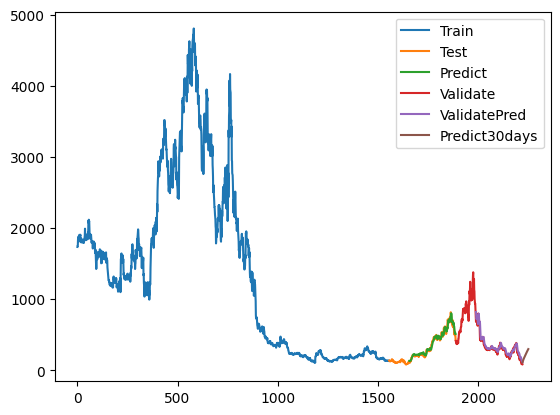

In [20]:
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred_test))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()